In [1]:
!pip install opendatasets -q

In [4]:
# import libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time

import opendatasets as od

In [5]:
# download dataset
od.download("https://www.kaggle.com/datasets/dineshpiyasamara/cats-and-dogs-for-classification")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: aththanagodakankan
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/dineshpiyasamara/cats-and-dogs-for-classification


100%|██████████| 217M/217M [00:11<00:00, 19.2MB/s]


In [6]:
BATCH_SIZE = 32
#training common batch size

IMAGE_SIZE = (128,128)
#Common image size t ouse to train

In [7]:
train_data_dir = "/content/cats-and-dogs-for-classification/cats_dogs/train"
test_data_dir = "/content/cats-and-dogs-for-classification/cats_dogs/test"


In [8]:
train_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE,
                                                         subset='training',
                                                         validation_split=0.1,
                                                         seed=42)


Found 8000 files belonging to 2 classes.
Using 7200 files for training.


In [9]:
validation_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE,
                                                         subset='validation',
                                                         validation_split=0.1,
                                                         seed=42)


Found 8000 files belonging to 2 classes.
Using 800 files for validation.


In [10]:
test_data = tf.keras.utils.image_dataset_from_directory(test_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE)

Found 2000 files belonging to 2 classes.


In [11]:
#create train ,validation and test data set

In [12]:
class_names = train_data.class_names
class_names

['cats', 'dogs']

In [13]:
for image_batch,label_batch in train_data.take(1):
    print(image_batch.shape)
    print(label_batch.shape)

(32, 128, 128, 3)
(32,)


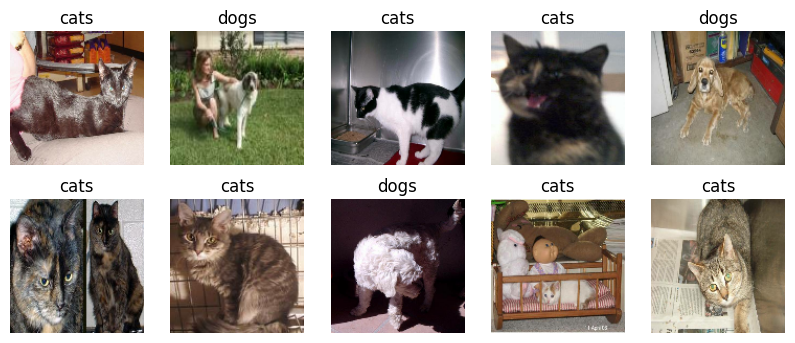

In [14]:
# plot data sample
plt.figure(figsize=(10,4))
for image,label in train_data.take(1):
    for i in range(10):
        ax = plt.subplot(2,5,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(class_names[label[i]])
        plt.axis('off')

In [15]:
for image,label in train_data.take(1):
    for i in range(1):
      print(image)

      #scaling images


tf.Tensor(
[[[[101.00769   104.00769   109.00769  ]
   [111.074585  112.71521   114.30505  ]
   [117.635284  115.31354   112.59396  ]
   ...
   [129.86246   132.91324   136.22964  ]
   [126.8725    133.10297   135.69281  ]
   [128.9002    138.99207   139.94614  ]]

  [[ 85.20029    88.20029    93.20029  ]
   [ 99.3725     99.79227   101.78906  ]
   [114.00287   112.997925  110.048706 ]
   ...
   [116.720825  120.720825  123.720825 ]
   [119.9389    126.16937   128.75922  ]
   [138.79547   147.0824    148.93893  ]]

  [[ 92.54297    94.90234    99.58203  ]
   [ 91.57605    91.986206   93.986206 ]
   [105.38388   104.38388   101.75107  ]
   ...
   [120.73743   125.52237   128.52237  ]
   [130.21445   135.21445   138.21445  ]
   [127.32648   134.36554   136.68585  ]]

  ...

  [[118.07504   122.07504   125.07504  ]
   [121.617584  125.617584  128.61758  ]
   [130.54602   134.54602   137.54602  ]
   ...
   [ 81.51825    87.02301    96.76108  ]
   [ 45.951294   50.819916   54.147003 ]
   [ 

In [16]:
train_data = train_data.map(lambda x,y:(x/255,y))
validation_data = validation_data.map(lambda x,y:(x/255,y))
test_data = test_data.map(lambda x,y:(x/255,y))

In [17]:
for image,label in train_data.take(1):
    for i in range(1):
      print(image)

tf.Tensor(
[[[[0.15117954 0.08451287 0.12372855]
   [0.1564951  0.08982843 0.12904412]
   [0.14387254 0.07720588 0.11642157]
   ...
   [0.         0.00392157 0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.15078124 0.08411458 0.12333027]
   [0.1463848  0.07971814 0.11893383]
   [0.13852635 0.07185968 0.11107536]
   ...
   [0.         0.         0.        ]
   [0.         0.00127145 0.        ]
   [0.         0.         0.        ]]

  [[0.15681386 0.09014719 0.12936288]
   [0.15010071 0.08343404 0.12264973]
   [0.1491728  0.08250613 0.12172181]
   ...
   [0.00392157 0.         0.        ]
   [0.         0.00392157 0.        ]
   [0.         0.         0.        ]]

  ...

  [[0.7237403  0.6738876  0.726761  ]
   [0.7528033  0.7035823  0.75956535]
   [0.77319306 0.71951526 0.7698836 ]
   ...
   [0.04705882 0.00392157 0.03529412]
   [0.05098039 0.         0.03529412]
   [0.0395804  0.         0.03137255]]

  [[0.7596398  0.66668636 0.694030

In [18]:
#data augmentation

data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",input_shape=(128,128,3)),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
  ]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
#create model

model = tf.keras.models.Sequential()

model.add(data_augmentation)

model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [22]:
start_time = time.time()

history = model.fit(train_data,
                    epochs=20,
                    validation_data=validation_data)

end_time = time.time()

Epoch 1/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 23s 52ms/step - accuracy: 0.5636 - loss: 0.7242 - val_accuracy: 0.5525 - val_loss: 0.6773
Epoch 2/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 13s 50ms/step - accuracy: 0.5977 - loss: 0.6624 - val_accuracy: 0.6137 - val_loss: 0.6514
Epoch 3/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - accuracy: 0.6392 - loss: 0.6402 - val_accuracy: 0.5850 - val_loss: 0.6993
Epoch 4/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 19s 51ms/step - accuracy: 0.6561 - loss: 0.6241 - val_accuracy: 0.6450 - val_loss: 0.6556
Epoch 5/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - accuracy: 0.6599 - loss: 0.6146 - val_accuracy: 0.5088 - val_loss: 0.8465
Epoch 6/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.6603 - loss: 0.6048 - val_accuracy: 0.6450 - val_loss: 0.6434
Epoch 7/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - accuracy: 0.6734 - loss: 0.5962 - val_accuracy: 0.7050 - val_loss: 0.5608
Epoch 8/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - accuracy: 0.6829 - loss: 0.5894 - 

In [23]:
print(f'Total time for training {(end_time-start_time):.3f} seconds')

Total time for training 308.537 seconds


To Increase accuracy, can increase epoch value

In [24]:
history = model.fit(train_data,
                    epochs=40,
                    validation_data=validation_data)

Epoch 1/40
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.7838 - loss: 0.4571 - val_accuracy: 0.8012 - val_loss: 0.4085
Epoch 2/40
225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.7806 - loss: 0.4393 - val_accuracy: 0.7550 - val_loss: 0.5272
Epoch 3/40
225/225 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.7958 - loss: 0.4365 - val_accuracy: 0.7650 - val_loss: 0.4767
Epoch 4/40
225/225 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.7909 - loss: 0.4369 - val_accuracy: 0.8012 - val_loss: 0.4219
Epoch 5/40
225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - accuracy: 0.8050 - loss: 0.4118 - val_accuracy: 0.8037 - val_loss: 0.4488
Epoch 6/40
225/225 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - accuracy: 0.8182 - loss: 0.4036 - val_accuracy: 0.8400 - val_loss: 0.3811
Epoch 7/40
225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - accuracy: 0.8181 - loss: 0.3971 - val_accuracy: 0.7825 - val_loss: 0.5125
Epoch 8/40
225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - accuracy: 0.8167 - loss: 0.3966 - v

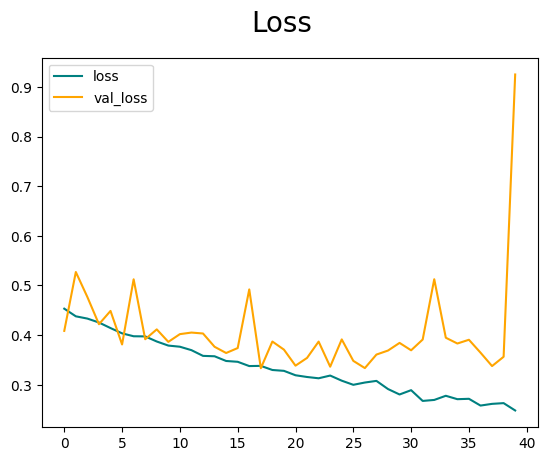

In [25]:
#performance Analyze

fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend()
plt.show()

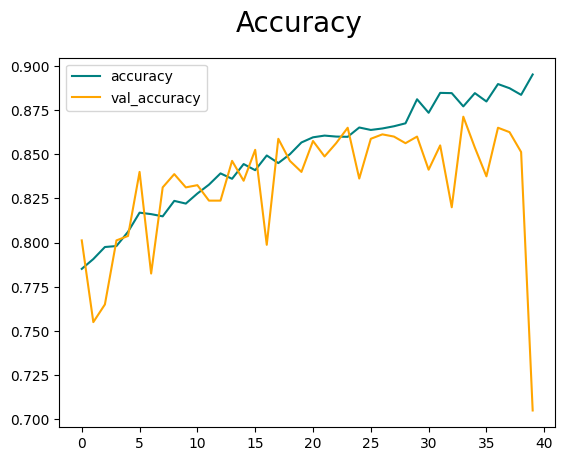

In [26]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend()
plt.show()

In [27]:
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuracy = tf.keras.metrics.BinaryAccuracy()

In [28]:
for batch in test_data.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━

In [29]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.64148444>

In [30]:
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.968>

In [31]:
accuracy.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.7135>

**Model Test**

In [32]:
!pip install opencv-python -q

In [33]:
import cv2

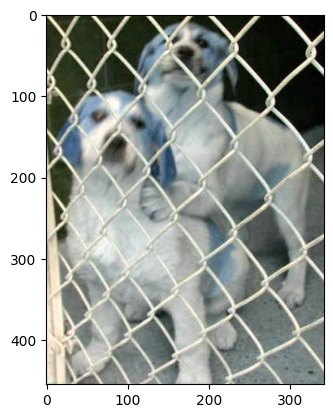

In [34]:
img = cv2.imread('/content/cats-and-dogs-for-classification/cats_dogs/test/dogs/dog.4008.jpg')
plt.imshow(img)
plt.show()

In [35]:
resized_image = tf.image.resize(img, IMAGE_SIZE)
scaled_image = resized_image/255

In [36]:
scaled_image.shape

TensorShape([128, 128, 3])

In [37]:
np.expand_dims(scaled_image, 0).shape

(1, 128, 128, 3)

In [38]:
yhat = model.predict(np.expand_dims(scaled_image, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


In [39]:
yhat

array([[0.9916946]], dtype=float32)

In [40]:
class_names

['cats', 'dogs']

In [41]:
if yhat > 0.5:
    print(f'{class_names[1]}')
else:
    print(f'{class_names[0]}')

dogs


Again Check

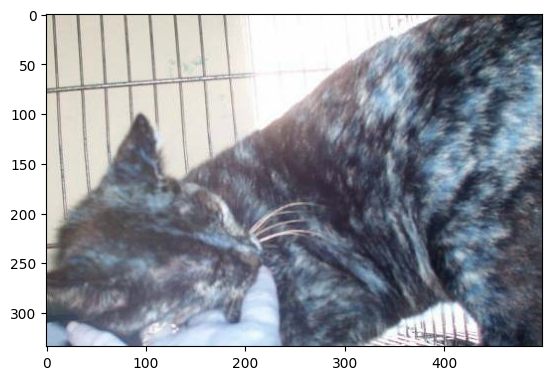

In [42]:
img = cv2.imread('/content/cats-and-dogs-for-classification/cats_dogs/test/cats/cat.4006.jpg')
plt.imshow(img)
plt.show()

In [43]:
resized_image = tf.image.resize(img, IMAGE_SIZE)
scaled_image = resized_image/255

In [46]:
scaled_image.shape


TensorShape([128, 128, 3])

In [47]:
np.expand_dims(scaled_image, 0).shape

(1, 128, 128, 3)

In [48]:
yhat = model.predict(np.expand_dims(scaled_image, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [49]:
yhat

array([[0.99786645]], dtype=float32)

In [50]:
class_names

['cats', 'dogs']

In [51]:
if yhat > 0.5:
    print(f'{class_names[1]}')
else:
    print(f'{class_names[0]}')

dogs


In [52]:
model.save('model.keras')

In [54]:
from google.colab import files
files.download('model.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>